In [128]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(10,6)})

In [129]:
losses = torch.load('models/unpruned_mse_logspace_losses.pt')
print(losses)

[0.05212645212809245, 0.02168112516403198, 0.024855520725250244, 0.015573949813842773, 0.012796512047449748, 0.011322894096374513, 0.007493613958358764, 0.0064966718355814615, 0.004473832448323568, 0.0030562888582547506, 0.00319111168384552, 0.002936810751756032, 0.002801761825879415, 0.002530649403731028, 0.002028446098168691, 0.0021005495389302574, 0.0021792046229044595, 0.0021562143166859943, 0.002147350609302521, 0.0019382324814796448, 0.0018171102305253348, 0.0017816642423470815, 0.0018084342777729035, 0.001846527357896169, 0.0018146989742914837, 0.0017955616116523744, 0.0017500058809916178, 0.001737852692604065, 0.0017316976686318716, 0.0017303728063901265, 0.0017260223130385081, 0.0017087855438391367, 0.0016984984278678894, 0.0016895222167174022, 0.0016911103824774425, 0.0016846649845441183, 0.0016731032729148864, 0.001661184181769689, 0.0016578590373198191, 0.0016566121578216553, 0.001651439368724823, 0.0016431748370329539, 0.001637378732363383, 0.001634527693192164, 0.00162967

Text(0, 0.5, 'Loss')

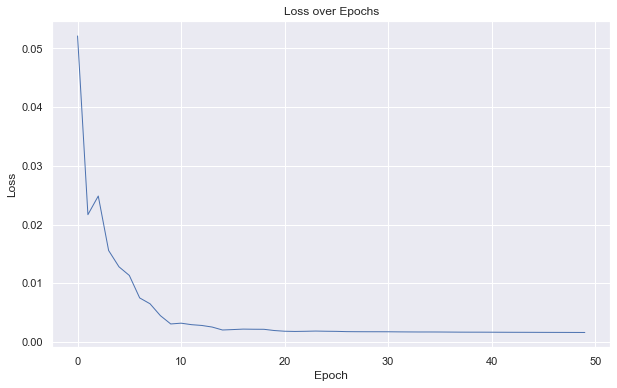

In [130]:
ax = sns.lineplot(losses, linewidth=1)
ax.set_title('Loss over Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')


# Model Performance Visualizations

In [131]:
# Setup Model
from model import GCN

model = GCN()
print(model)
model.load_state_dict(torch.load("models/unpruned_mse_logspace.pt"))
model = model.eval()

GCN(
  (relu): ReLU()
  (conv1): SAGEConv(2, 32, aggr=mean)
  (conv2): SAGEConv(32, 128, aggr=mean)
  (conv3): SAGEConv(128, 128, aggr=mean)
  (conv4): SAGEConv(128, 128, aggr=mean)
  (conv5): SAGEConv(128, 128, aggr=mean)
  (lin): Linear(in_features=128, out_features=1, bias=True)
  (leaky): LeakyReLU(negative_slope=0.01)
)


In [146]:
data = torch.load("datasets/unpruned/SG256_SM_Only_Train.pt")

y_truth = np.array([])
y_pred = np.array([])
for graph in data:
    graph.x = torch.tensor([[data[0], data[1]] for data in graph.x])

    # Logspace calcs
    graph.y = torch.log10(graph.y)
    graph.x[:, 0] = torch.log10(graph.x[:, 0])

    for item in graph.y:
        y_truth = np.append(y_truth, item)

    out = model(graph)
    for item in out.tolist():
        y_pred = np.append(y_pred, item[0])

# unlogspace
y_truth = 10 ** y_truth
y_pred = 10 ** y_pred

In [147]:
# Split for analysis
large_idx = y_truth > 1e3
y_truth_large = y_truth[large_idx]
y_pred_large = y_pred[large_idx]

y_truth_small = y_truth[~large_idx]
y_pred_small = y_pred[~large_idx]

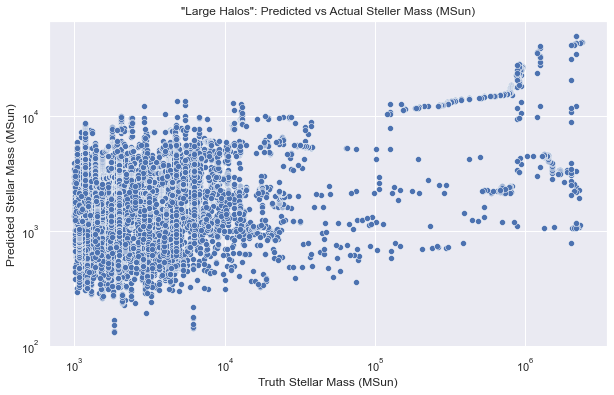

In [148]:
ax = sns.scatterplot(x=y_truth_large, y=y_pred_large)
ax.set_title('"Large Halos": Predicted vs Actual Steller Mass (MSun)')
ax.set_xlabel('Truth Stellar Mass (MSun)')
ax.set_ylabel('Predicted Stellar Mass (MSun)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.autoscale(True)

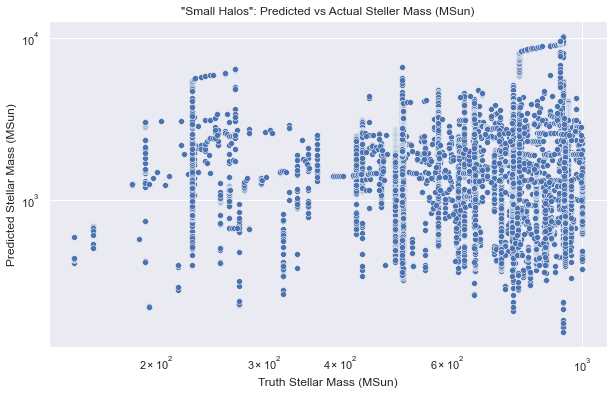

In [149]:
ax = sns.scatterplot(x=y_truth_small, y=y_pred_small)
ax.set_title('"Small Halos": Predicted vs Actual Steller Mass (MSun)')
ax.set_xlabel('Truth Stellar Mass (MSun)')
ax.set_ylabel('Predicted Stellar Mass (MSun)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.autoscale(True)

Mean absolute error: 58.445487684869214%


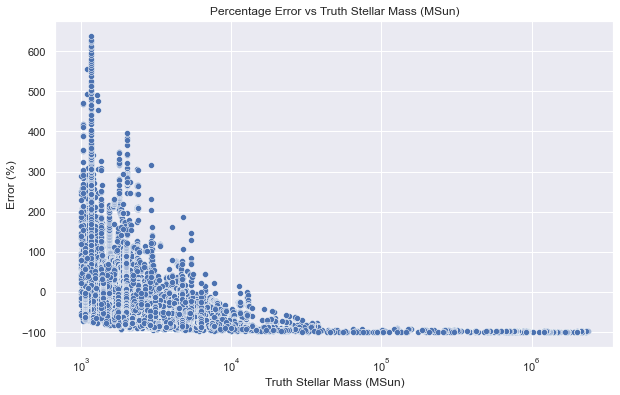

In [150]:
error = ((y_pred_large - y_truth_large) / y_truth_large) * 100
ax = sns.scatterplot(x=y_truth_large, y=error)
ax.set_xscale('log')
ax.set_title('Percentage Error vs Truth Stellar Mass (MSun)')
ax.set_ylabel('Error (%)')
ax.set_xlabel('Truth Stellar Mass (MSun)')
print(f'Mean absolute error: {np.mean(np.abs(error))}%')

Mean absolute error: 335.66802777116465%


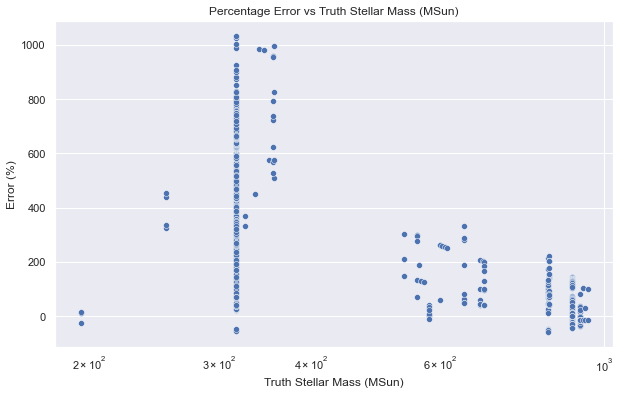

In [145]:
error = ((y_pred_small - y_truth_small) / y_truth_small) * 100
ax = sns.scatterplot(x=y_truth_small, y=error)
ax.set_xscale('log')
ax.set_title('Percentage Error vs Truth Stellar Mass (MSun)')
ax.set_ylabel('Error (%)')
ax.set_xlabel('Truth Stellar Mass (MSun)')
print(f'Mean absolute error: {np.mean(np.abs(error))}%')